<!-- dom:TITLE: Data Analysis and Machine Learning: Using Neural networks to solve ODEs and PDEs -->
# Data Analysis and Machine Learning: Using Neural networks to solve ODEs and PDEs
<!-- dom:AUTHOR: Kristine Baluka Hein at Department of Informatics, University of Oslo, Norway -->
<!-- Author: -->  
**Kristine Baluka Hein**, Department of Informatics, University of Oslo, Norway

Date: **Nov 11, 2018**

## Differential equations

The Universal Approximation Theorem states that a neural network can approximate any function at a single hidden layer along with one input and output layer to any given precision.
Having this in mind, we will look closer at whether a neural network manages to solve for a function in an equation.

A differential equation is an equation where the solution is a function. In the equation, it is given some relations between the function's derivatives subject to some given conditions.
Typically, a differential equation is solved numerically using approximations of Taylor series.
These kind of methods usually depends of choosing step sizes along each dimension that are small enough for the approximations to yield accurate results.
As we will see in the examples, using a neural network manages to outperform some well known methods in selected cases.
A possible way to solve the equation that we will look into, is to formulate a trial solution involving the result from a neural network.
The trial solution should hopefully converge into the true solution.
Be aware though, not all differential equations has an analytical solution.
We will stick with those that has an analytical solution such that we can check how well the network performs.
To make the trial solution converge to the true solution, setting up the cost function and updating the weights and biases within the neural network is crucial for the trial solution to converge.

## Description of the equation to solve for
A differential equation is a equation where the solution is a function.
The equation describes how the derivatives of the function behaves in a given domain along with some conditions.

Given a differential equation, it is desirable to know how to reformulate it into an equation a neural network can solve.
Having decided on which activation functions each layer should use, along with the number of hidden layers and neurons within each layer,
the changeable parameters of a neural network are the weights and biases for each neuron in every layer in the net.
If a differential equation is reformulated into an equation where minimization of some parameters must be done,
a neural net could possibly solve this equation.

A trial solution might be tricky to find in general.
Due to the Universal Approximation Theorem, one could hope that outcome of the deep neural net might solve a given differential equation, even though it is used in a simple trial solution.
Let us try this idea on some well-known ordinary differential equations and thereafter try to solve for functions defined by two variables, giving partial differential equations.

## Ordinary Differential Equations
An ordinary differential equation (ODE) is an equation involving functions having one variable.

In general, an ordinary differential equation looks like

<!-- Equation labels as ordinary links -->
<div id="ode"></div>

$$
\begin{equation} \label{ode} \tag{1}
f\left(x, \, g(x), \, g'(x), \, g''(x), \, \dots \, , \, g^{(n)}(x)\right) = 0
\end{equation}
$$

where $g(x)$ is the function to find, and $g^{(n)}(x)$ is the $n$-th derivative of $g(x)$.

The $f\left(x, g(x), g'(x), g''(x), \, \dots \, , g^{(n)}(x)\right)$ is just a way to write that there is an expression involving $x$ and $g(x), \ g'(x), \ g''(x), \, \dots \, , \text{ and } g^{(n)}(x)$ on the left side of the equality sign in ([ode](#ode)).
The highest order of derivative, that is the value of $n$, determines to the order of the equation.
The equation is referred to as a $n$-th order ODE.
Along with ([ode](#ode)), some additional conditions of the function $g(x)$ are typically given
for the solution to be unique.

## The trial solution
Let the trial solution $g_t(x)$ be

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
	g_t(x) = h_1(x) + h_2(x,N(x,P))
\label{_auto1} \tag{2}
\end{equation}
$$

where $h_1(x)$ is a function that makes $g_t(x)$ satisfy a given set of conditions, $N(x,P)$ a neural network with weights and biases described by $P$ and $h_2(x, N(x,P))$ some expression involving the neural network.
The role of the function $h_2(x, N(x,P))$, is to ensure that the output from $N(x,P)$ is zero when $g_t(x)$ is evaluated at the values of $x$ where the given conditions must be satisfied.
The function $h_1(x)$ should alone make $g_t(x)$ satisfy the conditions.

But what about the network $N(x,P)$?
As described previously, an optimization method could be used to minimize the parameters of a neural network, that being its weights and biases, through backward propagation.
For the minimization to be defined, we need to have a cost function at hand to minimize.

It is given that $f\left(x, \, g(x), \, g'(x), \, g''(x), \, \dots \, , \, g^{(n)}(x)\right)$ should be equal to zero in ([ode](#ode)).
We can choose to consider the mean squared error as the cost function for an input $x$.
Since we are looking at one input, the cost function is just $f$ squared.
The cost function $c\left(x, P \right)$ can therefore be expressed as

$$
c\left(x, P\right) = \big(f\left(x, \, g(x), \, g'(x), \, g''(x), \, \dots \, , \, g^{(n)}(x)\right)\big)^2
$$

If $N$ inputs are given as a vector $\vec x$ with elements $x_i$ for $i = 1,\dots,N$,
the cost function becomes

<!-- Equation labels as ordinary links -->
<div id="cost"></div>

$$
\begin{equation} \label{cost} \tag{3}
	c\left(\vec x, P\right) = \frac{1}{N} \sum_{i=1}^N \big(f\left(x_i, \, g(x_i), \, g'(x_i), \, g''(x_i), \, \dots \, , \, g^{(n)}(x_i)\right)\big)^2
\end{equation}
$$

The neural net should then find some parameters $P$ that minimizes the cost function in
([cost](#cost)) for a set of $N$ training samples $x_i$.

## Minimizing the cost function using gradient descent and automatic differentiation
To perform the minimization using gradient descent, the gradient of $c\left(\vec x, P\right)$ is needed.
It might happen so that finding an analytical expression of the gradient of $c(\vec x, P)$ from ([cost](#cost)) gets too messy, depending on which cost function one desires to use.

Luckily, there exists libraries that makes the job for us through automatic differentiation.
Automatic differentiation is a method of finding the derivatives numerically with very high precision.

In the forthcoming examples presenting possible usages of Autograd and TensorFlow,
it is shown how one could set up a neural network using gradient descent solving a differential
equation.

## Example: Exponential decay and setting up the network using Autograd
An exponential decay of a quantity $g(x)$ is described by the equation

<!-- Equation labels as ordinary links -->
<div id="solve_expdec"></div>

$$
\begin{equation} \label{solve_expdec} \tag{4}
  g'(x) = -\gamma g(x)
\end{equation}
$$

with $g(0) = g_0$ for some chosen initial value $g_0$.

The analytical solution of ([solve_expdec](#solve_expdec)) is

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
  g(x) = g_0 \exp\left(-\gamma x\right)
\label{_auto2} \tag{5}
\end{equation}
$$

Having an analytical solution at hand, it is possible to use it to compare how well a neural network finds a solution of ([solve_expdec](#solve_expdec)).

In this example, a neural network will be implemented using Autograd in order to perform backpropagation.

## The function to solve for

The program will use a neural network to solve

<!-- Equation labels as ordinary links -->
<div id="solveode"></div>

$$
\begin{equation} \label{solveode} \tag{6}
g'(x) = -\gamma g(x)
\end{equation}
$$

where $g(0) = g_0$ with $\gamma$ and $g_0$ being some chosen values.

In this example, $\gamma = 2$ and $g_0 = 10$.

## The trial solution
To begin with, a trial solution $g_t(t)$ must be chosen. A general trial solution for ordinary differential equations could be

$$
g_t(x, P) = h_1(x) + h_2(x, N(x, P))
$$

with $h_1(x)$ ensuring that $g_t(x)$ satisfies some conditions and $h_2(x,N(x, P))$ an expression involving $x$ and the output from the neural network $N(x,P)$ with $P $ being the collection of the weights and biases for each layer. For now, it is assumed that the network consists of one input layer, one hidden layer, and one output layer.

In this network, there are no weights and bias at the input layer, so $P = \{ P_{\text{hidden}},  P_{\text{output}} \}$.
If there are $N_{\text{hidden} }$ neurons in the hidden layer, then $P_{\text{hidden}}$ is a $N_{\text{hidden} } \times (1 + N_{\text{input}})$ matrix, given that there are $N_{\text{input}}$ neurons in the input layer.

The first column in $P_{\text{hidden} }$ represents the bias for each neuron in the hidden layer and the second column represents the weights for each neuron in the hidden layer from the input layer.
If there are $N_{\text{output} }$ neurons in the output layer, then $P_{\text{output}} $ is a $N_{\text{output} } \times (1 + N_{\text{hidden} })$ matrix.

Its first column represents the bias of each neuron and the remaining columns represents the weights to each neuron.

It is given that $g(0) = g_0$. The trial solution must fulfill this condition to be a proper solution of ([solveode](#solveode)). A possible way to ensure that $g_t(0, P) = g_0$, is to let $F(N(x,P)) = x \cdot N(x,P)$ and $A(x) = g_0$. This gives the following trial solution:

<!-- Equation labels as ordinary links -->
<div id="trial"></div>

$$
\begin{equation} \label{trial} \tag{7}
g_t(x, P) = g_0 + x \cdot N(x, P)
\end{equation}
$$

## Reformulating the problem
We wish that our neural network manages to minimize a given cost function.

A reformulation of out equation, ([solveode](#solveode)), must therefore be done,
such that it describes the problem a neural network can solve for.

The neural network must find the set of weights and biases $P$ such that the trial solution in ([trial](#trial)) satisfies ([solveode](#solveode)).

The trial solution

$$
g_t(x, P) = g_0 + x \cdot N(x, P)
$$

has been chosen such that it already solves the condition $g(0) = g_0$. What remains, is to find $P$ such that

<!-- Equation labels as ordinary links -->
<div id="nnmin"></div>

$$
\begin{equation} \label{nnmin} \tag{8}
g_t'(x, P) = - \gamma g_t(x, P)
\end{equation}
$$

is fulfilled as *best as possible*.

The left hand side and right hand side of ([nnmin](#nnmin)) must be computed separately, and then the neural network must choose weights and biases, contained in $P$, such that the sides are equal as best as possible.
This means that the absolute or squared difference between the sides must be as close to zero, ideally equal to zero.
In this case, the difference squared shows to be an appropriate measurement of how erroneous the trial solution is with respect to $P$ of the neural network.

This gives the following cost function our neural network must solve for:

$$
\min_{P}\Big\{ \big(g_t'(x, P) - ( -\gamma g_t(x, P) \big)^2 \Big\}
$$

(the notation $\min_{P}\{ f(x, P) \}$ means that we desire to find $P$ that yields the minimum of $f(x, P)$)

or, in terms of weights and biases for the hidden and output layer in our network:

$$
\min_{P_{\text{hidden} }, \ P_{\text{output} }}\Big\{ \big(g_t'(x, \{ P_{\text{hidden} }, P_{\text{output} }\}) - ( -\gamma g_t(x, \{ P_{\text{hidden} }, P_{\text{output} }\}) \big)^2 \Big\}
$$

for an input value $x$.

If the neural network evaluates $g_t(x, P)$ at more values for $x$, say $N$ values $x_i$ for $i = 1, \dots, N$, then the *total* error to minimize becomes

<!-- Equation labels as ordinary links -->
<div id="min"></div>

$$
\begin{equation} \label{min} \tag{9}
\min_{P}\Big\{\frac{1}{N} \sum_{i=1}^N  \big(g_t'(x_i, P) - ( -\gamma g_t(x_i, P) \big)^2 \Big\}
\end{equation}
$$

Letting $\vec x$ be a vector with elements $x_i$ and $c(\vec x, P) = \frac{1}{N} \sum_i  \big(g_t'(x_i, P) - ( -\gamma g_t(x_i, P) \big)^2$ denote the cost function, the minimization problem that our network must solve, becomes

$$
\min_{P} c(\vec x, P)
$$

In terms of $P_{\text{hidden} }$ and $P_{\text{output} }$, this could also be expressed as

$$
\min_{P_{\text{hidden} }, \ P_{\text{output} }} c(\vec x, \{P_{\text{hidden} }, P_{\text{output} }\})
$$

## A possible implementation of a neural network using Autograd

For simplicity, it is assumed that the input is an array $\vec x = (x_1, \dots, x_N)$ with $N$ elements. It is at these points the neural network should find $P$ such that it fulfills ([min](#min)).

First, the neural network must feed forward the inputs.
This means that $\vec x$ must be passed through an input layer, a hidden layer and a output layer. The input layer in this case, does not need to process the data any further.
The input layer will consist of $N_{\text{input} }$ neurons, passing its element to each neuron in the hidden layer.  The number of neurons in the hidden layer will be $N_{\text{hidden} }$.

For the $i$-th in the hidden layer with weight $w_i^{\text{hidden} }$ and bias $b_i^{\text{hidden} }$, the weighting from the $j$-th neuron at the input layer is:

$$
\begin{aligned}
z_{i,j}^{\text{hidden}} &= b_i^{\text{hidden}} + w_i^{\text{hidden}}x_j \\
&=
\begin{pmatrix}
b_i^{\text{hidden}} & w_i^{\text{hidden}}
\end{pmatrix}
\begin{pmatrix}
1 \\
x_j
\end{pmatrix}
\end{aligned}
$$

The result after weighting the inputs at the $i$-th hidden neuron can be written as a vector:

$$
\begin{aligned}
\vec{z}_{i}^{\text{hidden}} &= \Big( b_i^{\text{hidden}} + w_i^{\text{hidden}}x_1 , \ b_i^{\text{hidden}} + w_i^{\text{hidden}} x_2, \ \dots \, , \ b_i^{\text{hidden}} + w_i^{\text{hidden}} x_N\Big)  \\
&=
\begin{pmatrix}
 b_i^{\text{hidden}}  & w_i^{\text{hidden}}
\end{pmatrix}
\begin{pmatrix}
1  & 1 & \dots & 1 \\
x_1 & x_2 & \dots & x_N
\end{pmatrix} \\
&= \vec{p}_{i, \text{hidden}}^T X
\end{aligned}
$$

The vector $\vec{p}_{i, \text{hidden}}^T$ constitutes each row in $P_{\text{hidden} }$, which contains the weights for the neural network to minimize according to ([min](#min)).

After having found $\vec{z}_{i}^{\text{hidden}} $ for every $i$-th neuron within the hidden layer, the vector will be sent to an activation function $a_i(\vec{z})$.

In this example, the sigmoid function has been chosen to be the activation function for each hidden neuron:

$$
f(z) = \frac{1}{1 + \exp{(-z)}}
$$

It is possible to use other activations functions for the hidden layer also.

The output $\vec{x}_i^{\text{hidden} }$from each $i$-th hidden neuron is:

$$
\vec{x}_i^{\text{hidden} } = f\big(  \vec{z}_{i}^{\text{hidden}} \big)
$$

The outputs $\vec{x}_i^{\text{hidden} } $ are then sent to the output layer.

The output layer consists of one neuron in this case, and combines the output from each of the neurons in the hidden layers. The output layer combines the results from the hidden layer using some weights $ w_i^{\text{output}}$ and biases $b_i^{\text{output}}$. In this case, it is assumes that the number of neurons in the output layer is one.

The procedure of weighting the output neuron $j$ in the hidden layer to the $i$-th neuron in the output layer is similar as for the hidden layer described previously.

$$
\begin{aligned}
z_{1,j}^{\text{output}} & =
\begin{pmatrix}
b_1^{\text{output}} & \vec{w}_1^{\text{output}}
\end{pmatrix}
\begin{pmatrix}
1 \\
\vec{x}_j^{\text{hidden}}
\end{pmatrix}
\end{aligned}
$$

Expressing $z_{1,j}^{\text{output}}$ as a vector gives the following way of weighting the inputs from the hidden layer:

$$
\vec{z}_{1}^{\text{output}} =
\begin{pmatrix}
b_1^{\text{output}} & \vec{w}_1^{\text{output}}
\end{pmatrix}
\begin{pmatrix}
1  & 1 & \dots & 1 \\
\vec{x}_1^{\text{hidden}} & \vec{x}_2^{\text{hidden}} & \dots & \vec{x}_N^{\text{hidden}}
\end{pmatrix}
$$

In this case we seek a continuous range of values since we are approximating a function. This means that after computing $\vec{z}_{1}^{\text{output}}$ the neural network has finished its feed forward step, and $\vec{z}_{1}^{\text{output}}$ is the final output of the network.

## Backpropagation using Autograd
The next step is to decide how the parameters should be changed such that they minimize the cost function.

The chosen cost function for this problem is

$$
c(\vec x, P) = \frac{1}{N} \sum_i  \big(g_t'(x_i, P) - ( -\gamma g_t(x_i, P) \big)^2
$$

In order to minimize the cost function, an optimization method must be chosen.

Here, gradient descent with a constant step size has been chosen.

## Gradient descent
The idea of the gradient descent algorithm is to update parameters in direction where the cost function decreases goes to a minimum.

In general, the update of some parameters $\vec \omega$ given a cost function defined by some weights $\vec \omega$, $c(\vec x, \vec \omega)$, goes as follows:

$$
\vec \omega_{\text{new} } = \vec \omega - \lambda \nabla_{\vec \omega} c(\vec x, \vec \omega)
$$

for a number of iterations or until $ \big|\big| \vec \omega_{\text{new} } - \vec \omega \big|\big|$ becomes smaller than some given tolerance.

The value of $\lambda$ decides how large steps the algorithm must take in the direction of $ \nabla_{\vec \omega} c(\vec x, \vec \omega)$.
The notation $\nabla_{\vec \omega}$ express the gradient with respect to the elements in $\vec \omega$.

In our case, we have to minimize the cost function $c(\vec x, P)$ with respect to the two sets of weights and biases, that is for the hidden layer $P_{\text{hidden} }$ and for the output layer $P_{\text{output} }$ .

This means that $P_{\text{hidden} }$ and $P_{\text{output} }$ is updated by

$$
\begin{aligned}
P_{\text{hidden},\text{new}} &= P_{\text{hidden}} - \lambda \nabla_{P_{\text{hidden}}} c(\vec x, P)  \\
P_{\text{output},\text{new}} &= P_{\text{output}} - \lambda \nabla_{P_{\text{output}}} c(\vec x, P)
\end{aligned}
$$

In general, one could risk using a cost function having gradients that are cumbersome to derive analytically.
For our case, the cost functions are just the mean squared error.
One could employ an implementation of the back propagation for this case, but we will emphasis
on how one could use automatic differentiation in order to train the network.

However, it might be useful to know how automatic differentiation can be used, e.g through Autograd, in order to test an implementation.

## The network with one input, hidden, and output layer

/usr/local/lib/python3.7/site-packages/autograd/numpy/numpy_vjps.py:444: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return lambda g: g[idxs]
/usr/local/lib/python3.7/site-packages/autograd/numpy/numpy_boxes.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  def __getitem__(A, idx): return A[idx]
/usr/local/lib/python3.7/site-packages/autograd/numpy/numpy_vjps.py:597: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interprete

Initial cost: 367.01
Final cost: 0.0666807
Max absolute difference: 0.0437499


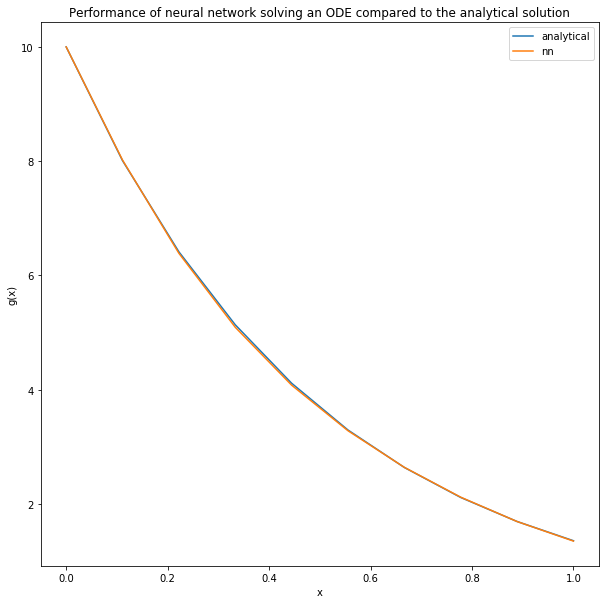

In [1]:
%matplotlib inline

# Autograd will be used for later, so the numpy wrapper for Autograd must be imported
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1/(1 + np.exp(-z))

# Assuming one input, hidden, and output layer
def neural_network(params, x):

    # Find the weights (including and biases) for the hidden and output layer.
    # Assume that params is a list of parameters for each layer.
    # The biases are the first element for each array in params,
    # and the weights are the remaning elements in each array in params.

    w_hidden = params[0]
    w_output = params[1]

    # Assumes input x being an one-dimensional array
    num_values = np.size(x)
    x = x.reshape(-1, num_values)

    # Assume that the input layer does nothing to the input x
    x_input = x

    ## Hidden layer:

    # Add a row of ones to include bias
    x_input = np.concatenate((np.ones((1,num_values)), x_input ), axis = 0)

    z_hidden = np.matmul(w_hidden, x_input)
    x_hidden = sigmoid(z_hidden)

    ## Output layer:

    # Include bias:
    x_hidden = np.concatenate((np.ones((1,num_values)), x_hidden ), axis = 0)

    z_output = np.matmul(w_output, x_hidden)
    x_output = z_output

    return x_output

# The trial solution using the deep neural network:
def g_trial(x,params, g0 = 10):
    return g0 + x*neural_network(params,x)

# The right side of the ODE:
def g(x, g_trial, gamma = 2):
    return -gamma*g_trial

# The cost function:
def cost_function(P, x):

    # Evaluate the trial function with the current parameters P
    g_t = g_trial(x,P)

    # Find the derivative w.r.t x of the neural network
    d_net_out = elementwise_grad(neural_network,1)(P,x)

    # Find the derivative w.r.t x of the trial function
    d_g_t = elementwise_grad(g_trial,0)(x,P)

    # The right side of the ODE
    func = g(x, g_t)

    err_sqr = (d_g_t - func)**2
    cost_sum = np.sum(err_sqr)

    return cost_sum / np.size(err_sqr)

# Solve the exponential decay ODE using neural network with one input, hidden, and output layer
def solve_ode_neural_network(x, num_neurons_hidden, num_iter, lmb):
    ## Set up initial weights and biases

    # For the hidden layer
    p0 = npr.randn(num_neurons_hidden, 2 )

    # For the output layer
    p1 = npr.randn(1, num_neurons_hidden + 1 ) # +1 since bias is included

    P = [p0, p1]

    print('Initial cost: %g'%cost_function(P, x))

    ## Start finding the optimal weights using gradient descent

    # Find the Python function that represents the gradient of the cost function
    # w.r.t the 0-th input argument -- that is the weights and biases in the hidden and output layer
    cost_function_grad = grad(cost_function,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        # Evaluate the gradient at the current weights and biases in P.
        # The cost_grad consist now of two arrays;
        # one for the gradient w.r.t P_hidden and
        # one for the gradient w.r.t P_output
        cost_grad =  cost_function_grad(P, x)

        P[0] = P[0] - lmb * cost_grad[0]
        P[1] = P[1] - lmb * cost_grad[1]

    print('Final cost: %g'%cost_function(P, x))

    return P

def g_analytic(x, gamma = 2, g0 = 10):
    return g0*np.exp(-gamma*x)

# Solve the given problem
if __name__ == '__main__':
    # Set seed such that the weight are initialized
    # with same weights and biases for every run.
    npr.seed(15)

    ## Decide the vales of arguments to the function to solve
    N = 10
    x = np.linspace(0, 1, N)

    ## Set up the initial parameters
    num_hidden_neurons = 10
    num_iter = 10000
    lmb = 0.001

    # Use the network
    P = solve_ode_neural_network(x, num_hidden_neurons, num_iter, lmb)

    # Print the deviation from the trial solution and true solution
    res = g_trial(x,P)
    res_analytical = g_analytic(x)

    print('Max absolute difference: %g'%np.max(np.abs(res - res_analytical)))

    # Plot the results
    plt.figure(figsize=(10,10))

    plt.title('Performance of neural network solving an ODE compared to the analytical solution')
    plt.plot(x, res_analytical)
    plt.plot(x, res[0,:])
    plt.legend(['analytical','nn'])
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.show()

## The network with one input layer, specified number of hidden layers, and one output layer  output layer

It is also possible to extend the construction of our network into a more general one, allowing the network to contain more than one hidden layers.

The number of neurons within each hidden layer are given as a list of integers in the program below.

Initial cost: 324.246
Final cost: 0.119936


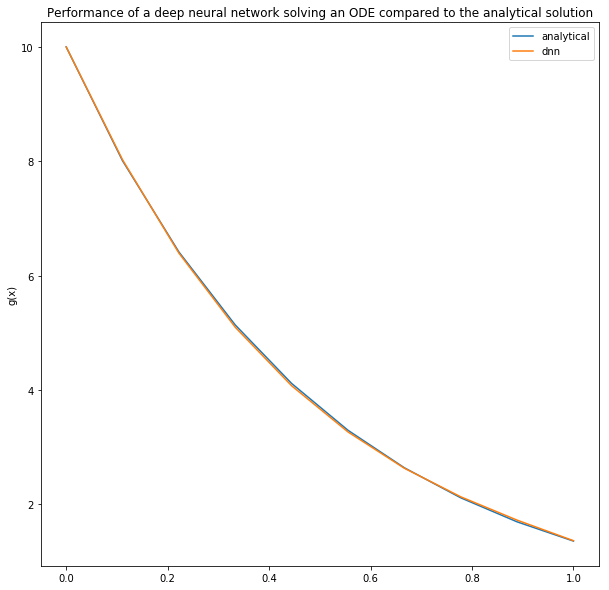

In [4]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1/(1 + np.exp(-z))

# The neural network with one input layer and one output layer,
# but with number of hidden layers specified by the user.
def deep_neural_network(deep_params, x):
    # N_hidden is the number of hidden layers

    N_hidden = np.size(deep_params) - 1 # -1 since params consists of
                                        # parameters to all the hidden
                                        # layers AND the output layer.

    # Assumes input x being an one-dimensional array
    num_values = np.size(x)
    x = x.reshape(-1, num_values)

    # Assume that the input layer does nothing to the input x
    x_input = x

    # Due to multiple hidden layers, define a variable referencing to the
    # output of the previous layer:
    x_prev = x_input

    ## Hidden layers:

    for l in range(N_hidden):
        # From the list of parameters P; find the correct weigths and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1,num_values)), x_prev ), axis = 0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:

    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1,num_values)), x_prev), axis = 0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output

# The trial solution using the deep neural network:
def g_trial_deep(x,params, g0 = 10):
    return g0 + x*deep_neural_network(params, x)

# The right side of the ODE:
def g(x, g_trial, gamma = 2):
    return -gamma*g_trial

# The same cost function as before, but calls deep_neural_network instead.
def cost_function_deep(P, x):

    # Evaluate the trial function with the current parameters P
    g_t = g_trial_deep(x,P)

    # Find the derivative w.r.t x of the neural network
    d_net_out = elementwise_grad(deep_neural_network,1)(P,x)

    # Find the derivative w.r.t x of the trial function
    d_g_t = elementwise_grad(g_trial_deep,0)(x,P)

    # The right side of the ODE
    func = g(x, g_t)

    err_sqr = (d_g_t - func)**2
    cost_sum = np.sum(err_sqr)

    return cost_sum / np.size(err_sqr)

# Solve the exponential decay ODE using neural network with one input and one output layer,
# but with specified number of hidden layers from the user.
def solve_ode_deep_neural_network(x, num_neurons, num_iter, lmb):
    # num_hidden_neurons is now a list of number of neurons within each hidden layer

    # The number of elements in the list num_hidden_neurons thus represents
    # the number of hidden layers.

    # Find the number of hidden layers:
    N_hidden = np.size(num_neurons)

    ## Set up initial weights and biases

    # Initialize the list of parameters:
    P = [None]*(N_hidden + 1) # + 1 to include the output layer

    P[0] = npr.randn(num_neurons[0], 2 )
    for l in range(1,N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l-1] + 1) # +1 to include bias

    # For the output layer
    P[-1] = npr.randn(1, num_neurons[-1] + 1 ) # +1 since bias is included

    print('Initial cost: %g'%cost_function_deep(P, x))

    ## Start finding the optimal weights using gradient descent

    # Find the Python function that represents the gradient of the cost function
    # w.r.t the 0-th input argument -- that is the weights and biases in the hidden and output layer
    cost_function_deep_grad = grad(cost_function_deep,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        # Evaluate the gradient at the current weights and biases in P.
        # The cost_grad consist now of N_hidden + 1 arrays; the gradient w.r.t the weights and biases
        # in the hidden layers and output layers evaluated at x.
        cost_deep_grad =  cost_function_deep_grad(P, x)

        for l in range(N_hidden+1):
            P[l] = P[l] - lmb * cost_deep_grad[l]

    print('Final cost: %g'%cost_function_deep(P, x))

    return P

def g_analytic(x, gamma = 2, g0 = 10):
    return g0*np.exp(-gamma*x)

# Solve the given problem
if __name__ == '__main__':
    npr.seed(15)

    ## Decide the vales of arguments to the function to solve
    N = 10
    x = np.linspace(0, 1, N)

    ## Set up the initial parameters
    num_hidden_neurons = np.array([10,10])
    num_iter = 10000
    lmb = 0.001

    P = solve_ode_deep_neural_network(x, num_hidden_neurons, num_iter, lmb)

    res = g_trial_deep(x,P)
    res_analytical = g_analytic(x)

    plt.figure(figsize=(10,10))

    plt.title('Performance of a deep neural network solving an ODE compared to the analytical solution')
    plt.plot(x, res_analytical)
    plt.plot(x, res[0,:])
    plt.legend(['analytical','dnn'])
    plt.ylabel('g(x)')
    plt.show()

## Example: Population growth, comparing Autograd, TensorFlow, and Euler's scheme

A logistic model of population growth assumes that a population converges toward an equilibrium.
The population growth can be modeled by

<!-- Equation labels as ordinary links -->
<div id="log"></div>

$$
\begin{equation} \label{log} \tag{10}
	g'(t) = \alpha g(t)(A - g(t))
\end{equation}
$$

where $g(t)$ is the population density at time $t$, $\alpha > 0$ the growth rate and $A > 0$ is the maximum population number in the environment.
Also, at $t = 0$ the population has the size $g(0) = g_0$, where $g_0$ is some chosen constant.

In this example, similar network as for the exponential decay using Autograd has been used to solve the equation. However, as the implementation might suffer from e.g numerical instability
and high execution time (this might be more apparent in the examples solving PDEs),
a network has been constructed using TensorFlow also.
For comparison, the forward Euler method has been implemented in order to see how the networks performs compared to a numerical scheme.

## Setting up the problem

Here, we will model a population $g(t)$ in an environment having carrying capacity $A$.
The population follows the model

<!-- Equation labels as ordinary links -->
<div id="solveode_population"></div>

$$
\begin{equation} \label{solveode_population} \tag{11}
g'(t) = \alpha g(t)(A - g(t))
\end{equation}
$$

where $g(0) = g_0$.

In this example, we let $\alpha = 2$, $A = 1$, and $g_0 = 1.2$.

## The trial solution
We will get a slightly different trial solution, as the boundary conditions are different
compared to the case for exponential decay.

A possible trial solution satisfying the condition $g(0) = g_0$ could be

$$
h_1(t) = g_0 + t \cdot N(t,P)
$$

with $N(t,P)$ being the output from the neural network with weights and biases for each layer collected in the set $P$.

The analytical solution is

$$
g(t) = \frac{Ag_0}{g_0 + (A - g_0)\exp(-\alpha A t)}
$$

## The program using Autograd

The network will be the similar as for the exponential decay example, but with some small modifications for our problem.

Initial cost: 0.221805
Final cost: 0.000417932
The max absolute difference between the solutions is: 0.00424909


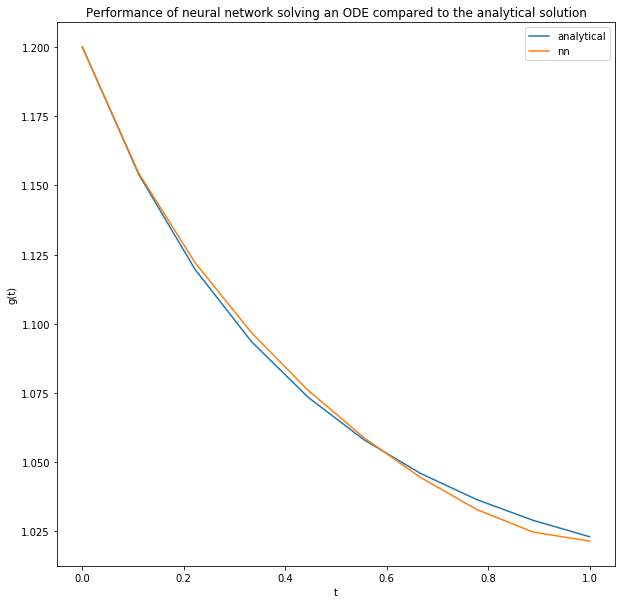

In [5]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1/(1 + np.exp(-z))

# Function to get the parameters.
# Done such that one can easily change the paramaters after one's liking.
def get_parameters():
    alpha = 2
    A = 1
    g0 = 1.2
    return alpha, A, g0

def deep_neural_network(P, x):
    # N_hidden is the number of hidden layers
    N_hidden = np.size(P) - 1 # -1 since params consist of parameters to all the hidden layers AND the output layer

    # Assumes input x being an one-dimensional array
    num_values = np.size(x)
    x = x.reshape(-1, num_values)

    # Assume that the input layer does nothing to the input x
    x_input = x

    # Due to multiple hidden layers, define a variable referencing to the
    # output of the previous layer:
    x_prev = x_input

    ## Hidden layers:

    for l in range(N_hidden):
        # From the list of parameters P; find the correct weigths and bias for this layer
        w_hidden = P[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1,num_values)), x_prev ), axis = 0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:

    # Get the weights and bias for this layer
    w_output = P[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1,num_values)), x_prev), axis = 0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output


def cost_function_deep(P, x):

    # Evaluate the trial function with the current parameters P
    g_t = g_trial_deep(x,P)

    # Find the derivative w.r.t x of the trial function
    d_g_t = elementwise_grad(g_trial_deep,0)(x,P)

    # The right side of the ODE
    func = f(x, g_t)

    err_sqr = (d_g_t - func)**2
    cost_sum = np.sum(err_sqr)

    return cost_sum / np.size(err_sqr)

# The right side of the ODE:
def f(x, g_trial):
    alpha,A, g0 = get_parameters()
    return alpha*g_trial*(A - g_trial)

# The trial solution using the deep neural network:
def g_trial_deep(x, params):
    alpha,A, g0 = get_parameters()
    return g0 + x*deep_neural_network(params,x)

# The analytical solution:
def g_analytic(t):
    alpha,A, g0 = get_parameters()
    return A*g0/(g0 + (A - g0)*np.exp(-alpha*A*t))

def solve_ode_deep_neural_network(x, num_neurons, num_iter, lmb):
    # num_hidden_neurons is now a list of number of neurons within each hidden layer

    # Find the number of hidden layers:
    N_hidden = np.size(num_neurons)

    ## Set up initial weigths and biases

    # Initialize the list of parameters:
    P = [None]*(N_hidden + 1) # + 1 to include the output layer

    P[0] = npr.randn(num_neurons[0], 2 )
    for l in range(1,N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l-1] + 1) # +1 to include bias

    # For the output layer
    P[-1] = npr.randn(1, num_neurons[-1] + 1 ) # +1 since bias is included

    print('Initial cost: %g'%cost_function_deep(P, x))

    ## Start finding the optimal weigths using gradient descent

    # Find the Python function that represents the gradient of the cost function
    # w.r.t the 0-th input argument -- that is the weights and biases in the hidden and output layer
    cost_function_deep_grad = grad(cost_function_deep,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        # Evaluate the gradient at the current weights and biases in P.
        # The cost_grad consist now of N_hidden + 1 arrays; the gradient w.r.t the weights and biases
        # in the hidden layers and output layers evaluated at x.
        cost_deep_grad =  cost_function_deep_grad(P, x)

        for l in range(N_hidden+1):
            P[l] = P[l] - lmb * cost_deep_grad[l]

    print('Final cost: %g'%cost_function_deep(P, x))

    return P

if __name__ == '__main__':
    npr.seed(4155)

    ## Decide the vales of arguments to the function to solve
    Nt = 10
    T = 1
    t = np.linspace(0,T, Nt)

    ## Set up the initial parameters
    num_hidden_neurons = [100, 50, 25]
    num_iter = 1000
    lmb = 1e-3

    P = solve_ode_deep_neural_network(t, num_hidden_neurons, num_iter, lmb)

    g_dnn_ag = g_trial_deep(t,P)
    g_analytical = g_analytic(t)

    # Find the maximum absolute difference between the solutons:
    diff_ag = np.max(np.abs(g_dnn_ag - g_analytical))
    print("The max absolute difference between the solutions is: %g"%diff_ag)

    plt.figure(figsize=(10,10))

    plt.title('Performance of neural network solving an ODE compared to the analytical solution')
    plt.plot(t, g_analytical)
    plt.plot(t, g_dnn_ag[0,:])
    plt.legend(['analytical','nn'])
    plt.xlabel('t')
    plt.ylabel('g(t)')

    plt.show()

## Using forward Euler to solve the ODE

A straight-forward way of solving an ODE numerically, is to use Euler's method.

Euler's method uses Taylor series to approximate the value at a function $f$ at a step $\Delta x$ from $x$:

$$
f(x + \Delta x) \approx f(x) + \Delta x f'(x)
$$

In our case, using Euler's method to approximate the value of $g$ at a step $\Delta t$ from $t$ yields

$$
\begin{aligned}
  g(t + \Delta t) &\approx g(t) + \Delta t g'(t) \\
  &= g(t) + \Delta t \big(\alpha g(t)(A - g(t))\big)
\end{aligned}
$$

along with the condition that $g(0) = g_0$.

Let $t_i = i \cdot \Delta t$ where $\Delta t = \frac{T}{N_t-1}$ where $T$ is the final time our solver must solve for and $N_t$ the number of values for $t \in [0, T]$ for $i = 0, \dots, N_t-1$.

For $i \geq 1$, we have that

$$
\begin{aligned}
t_i &= i\Delta t \\
&= (i - 1)\Delta t + \Delta t \\
&= t_{i-1} + \Delta t
\end{aligned}
$$

Now, if $g_i = g(t_i)$ then

<!-- Equation labels as ordinary links -->
<div id="odenum"></div>

$$
\begin{equation}
  \begin{aligned}
  g_i &= g(t_i) \\
  &= g(t_{i-1} + \Delta t) \\
  &\approx g(t_{i-1}) + \Delta t \big(\alpha g(t_{i-1})(A - g(t_{i-1}))\big) \\
  &= g_{i-1} + \Delta t \big(\alpha g_{i-1}(A - g_{i-1})\big)
  \end{aligned}
\end{equation} \label{odenum} \tag{12}
$$

for $i \geq 1$ and $g_0 = g(t_0) = g(0) = g_0$.

Equation ([odenum](#odenum)) could be implemented in the following way,
extending the program that uses the network using Autograd:

Initial cost: 0.221805
Final cost: 0.000417932
The max absolute difference between the solutions is: 0.00424909
Max absolute difference between Euler method and analytical: 0.011225
Max absolute difference between deep neural network and analytical: 0.00424909


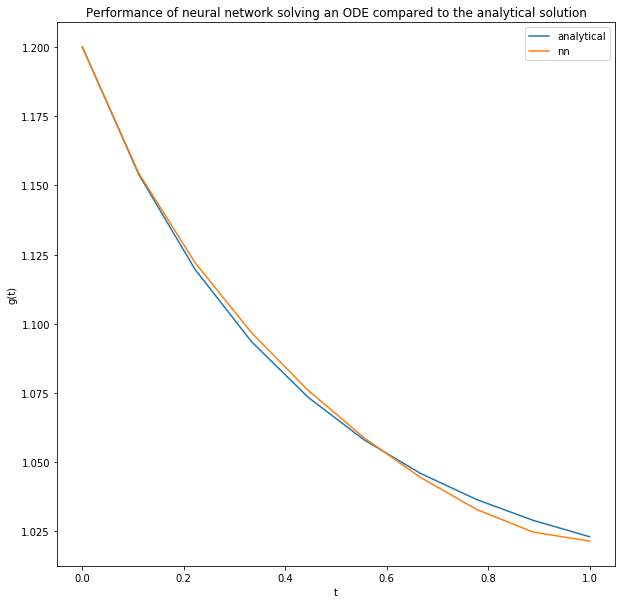

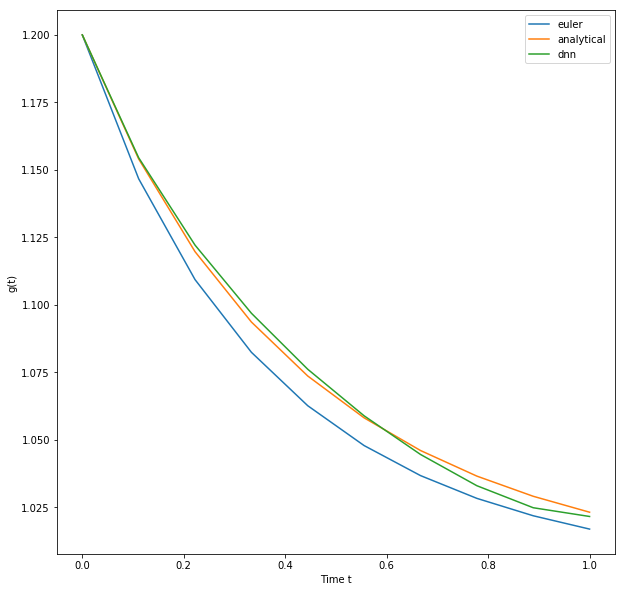

In [6]:
# Assume that all function definitions from the example program using Autograd
# are located here.

if __name__ == '__main__':
    npr.seed(4155)

    ## Decide the vales of arguments to the function to solve
    Nt = 10
    T = 1
    t = np.linspace(0,T, Nt)

    ## Set up the initial parameters
    num_hidden_neurons = [100,50,25]
    num_iter = 1000
    lmb = 1e-3

    P = solve_ode_deep_neural_network(t, num_hidden_neurons, num_iter, lmb)

    g_dnn_ag = g_trial_deep(t,P)
    g_analytical = g_analytic(t)

    # Find the maximum absolute difference between the solutons:
    diff_ag = np.max(np.abs(g_dnn_ag - g_analytical))
    print("The max absolute difference between the solutions is: %g"%diff_ag)

    plt.figure(figsize=(10,10))

    plt.title('Performance of neural network solving an ODE compared to the analytical solution')
    plt.plot(t, g_analytical)
    plt.plot(t, g_dnn_ag[0,:])
    plt.legend(['analytical','nn'])
    plt.xlabel('t')
    plt.ylabel('g(t)')

    ## Find an approximation to the funtion using forward Euler

    alpha, A, g0 = get_parameters()
    dt = T/(Nt - 1)

    # Perform forward Euler to solve the ODE
    g_euler = np.zeros(Nt)
    g_euler[0] = g0

    for i in range(1,Nt):
        g_euler[i] = g_euler[i-1] + dt*(alpha*g_euler[i-1]*(A - g_euler[i-1]))

    # Print the errors done by each method
    diff1 = np.max(np.abs(g_euler - g_analytical))
    diff2 = np.max(np.abs(g_dnn_ag[0,:] - g_analytical))

    print('Max absolute difference between Euler method and analytical: %g'%diff1)
    print('Max absolute difference between deep neural network and analytical: %g'%diff2)

    # Plot results
    plt.figure(figsize=(10,10))

    plt.plot(t,g_euler)
    plt.plot(t,g_analytical)
    plt.plot(t,g_dnn_ag[0,:])

    plt.legend(['euler','analytical','dnn'])
    plt.xlabel('Time t')
    plt.ylabel('g(t)')

    plt.show()

Running the program gives

        Max absolute difference between Euler method and analytical: 0.011225
        Max absolute difference between deep neural network and analytical: 0.00424909


## Using TensorFlow to model logistic population growth

TensorFlow is a library widely used in the machine learning community.
A neural network can be set up in a flexible manner, where various optimization algorithms are implemented and different types of networks can be used, making it easier to experiment on solving differential equations using neural networks.

## The general program flow in TensorFlow

Usually, a program in TensorFlow is divided into two parts; the *construction phase* and the *execution phase*.
In the construction phase, the computational graph that TensorFlow uses to perform its calculations are set up.
In the execution phase, TensorFlow evaluates any procedure that was defined in the construction phase.

## Program flow in TensorFlow - Construction phase

Here, the architecture for the neural network will be set up, along with the cost function and an optimizer class used during training of the network.
Note that TensorFlow uses a different convention for the weighting done in each neuron in each layer within the network than in the implementation using Autograd.
The matrix-vector multiplication between the input from the previous layer and the weighting at the neuron at current layer in the program using Autograd, is the transpose of the convention used in TensorFlow. But it will not affect that much our construction, as TensorFlow takes care of most of the computations. The only thing we have to be aware of, is how the dimensions are for our inputs.

## Program flow in TensorFlow - Execution phase

The computation graph has been defined, and is ready to be evaluated.
In order to get access to the graph, it has to be initialized and be runned within a Session.

## The full program modeling logistic population growth using TensorFlow

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Initial cost: 2.48635
Final cost: 0.00207475

Max absolute difference between the analytical solution and solution from TensorFlow DNN: 0.00887326


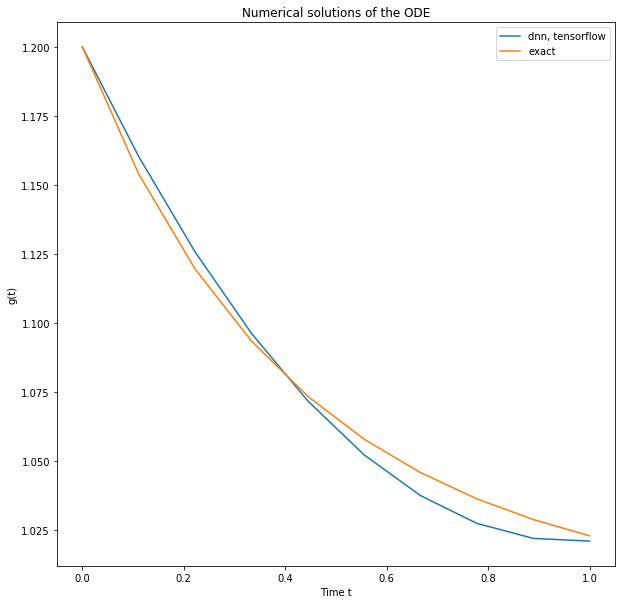

In [8]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.reset_default_graph()
#import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Just to reset the graph such that it is possible to rerun this in a
# Jupyter cell without resetting the whole kernel.
tf.reset_default_graph()

# Set a seed to ensure getting the same results from every run
tf.set_random_seed(4155)

Nt = 10
T = 1
t = np.linspace(0,T, Nt)

## The construction phase

# Convert the values the trial solution is evaluated at to a tensor.
t_tf = tf.convert_to_tensor(t.reshape(-1,1),dtype=tf.float64)
zeros = tf.reshape(tf.convert_to_tensor(np.zeros(t.shape)),shape=(-1,1))

# Define the parameters of the equation
alpha = tf.constant(2.,dtype=tf.float64)
A = tf.constant(1.,dtype=tf.float64)
g0 = tf.constant(1.2,dtype=tf.float64)

num_iter = 100000

# Define the number of neurons at each hidden layer
num_hidden_neurons = [100,50,25]
num_hidden_layers = np.size(num_hidden_neurons)

# Construct the network.
# tf.name_scope is used to group each step in the construction,
# just for a more organized visualization in TensorBoard
with tf.name_scope('dnn'):

    # Input layer
    previous_layer = t_tf

    # Hidden layers
    for l in range(num_hidden_layers):
        current_layer = tf.layers.dense(previous_layer, num_hidden_neurons[l], name='hidden%d'%(l+1), activation=tf.nn.sigmoid)
        previous_layer = current_layer

    # Output layer
    dnn_output = tf.layers.dense(previous_layer, 1, name='output')

# Define the cost function
with tf.name_scope('cost'):
    g_trial = g0 + t_tf*dnn_output
    d_g_trial = tf.gradients(g_trial,t_tf)

    func = alpha*g_trial*(A - g_trial)
    cost = tf.losses.mean_squared_error(zeros, d_g_trial[0] - func)


# Choose the method to minimize the cost function, along with a learning rate
learning_rate = 1e-2
with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    traning_op = optimizer.minimize(cost)

# Set up a referance to the result from the neural network:
g_dnn_tf = None

# Define a node that initializes all of the other nodes in the computational graph
# used by TensorFlow:
init = tf.global_variables_initializer()

## Execution phase

# Start a session where the graph defined from the construction phase can be evaluated at:
with tf.Session() as sess:
    # Initialize the whole graph
    init.run()

    # Evaluate the initial cost:
    print('Initial cost: %g'%cost.eval())

    # The training of the network:
    for i in range(num_iter):
        sess.run(traning_op)

        # If one desires to see how the cost function behaves for each iteration:
        #if i % 1000 == 0:
        #    print(cost.eval())

    # Training is done, and we have an approximate solution to the ODE
    print('Final cost: %g'%cost.eval())

    # Store the result
    g_dnn_tf = g_trial.eval()

# Compare with analytical solution
def get_parameters():
    alpha = 2
    A = 1
    g0 = 1.2
    return alpha, A, g0

def g_analytic(t):
    alpha,A, g0 = get_parameters()
    return A*g0/(g0 + (A - g0)*np.exp(-alpha*A*t))

g_analytical = g_analytic(t)
diff_tf = g_dnn_tf - g_analytical.reshape(-1,1)

print('\nMax absolute difference between the analytical solution and solution from TensorFlow DNN: %g'%np.max(np.abs(diff_tf)))

# Plot the result
plt.figure(figsize=(10,10))

plt.title('Numerical solutions of the ODE')

plt.plot(t, g_dnn_tf)
plt.plot(t, g_analytical)

plt.legend(['dnn, tensorflow', 'exact'])
plt.xlabel('Time t')
plt.ylabel('g(t)')

plt.show()

## Example: Solving the one dimensional Poisson equation using Autograd and TensorFlow

The Poisson equation for $g(x)$ in one dimension is

<!-- Equation labels as ordinary links -->
<div id="poisson"></div>

$$
\begin{equation} \label{poisson} \tag{13}
  -g''(x) = f(x)
\end{equation}
$$

where $f(x)$ is a given function for $x \in (0,1)$.

The conditions that $g(x)$ is chosen to fulfill, are

$$
\begin{align*}
  g(0) &= 0 \\
  g(1) &= 0
\end{align*}
$$

This equation can be solved numerically using programs where e.g Autograd and TensorFlow are used.
The results from the networks can then be compared to the analytical solution.
In addition, it could be interesting to see how a typical method for numerically solving second order ODEs compares to the neural networks.

There exists many different optimization methods implemented in TensorFlow.
In the examples program using TensorFlow, it could also be of interest to see how
the choice of an optimization method affects our results.
In the [TensorFlow documentation about optimizers](https://www.tensorflow.org/versions/r1.2/api_guides/python/train#Optimizers), a list over available optimization methods are shown.

## The specific equation to solve for

Here, the function $g(x)$ to solve for follows the equation

$$
-g''(x) = f(x),\qquad x \in (0,1)
$$

where $f(x)$ is a given function, along with the chosen conditions

<!-- Equation labels as ordinary links -->
<div id="cond"></div>

$$
\begin{aligned}
g(0) = g(1) = 0
\end{aligned}\label{cond} \tag{14}
$$

In this example, we consider the case when $f(x) = (3x + x^2)\exp(x)$.

For this case, a possible trial solution satisfying the conditions could be

$$
g_t(x) = x \cdot (1-x) \cdot N(P,x)
$$

The analytical solution for this problem is

$$
g(x) = x(1 - x)\exp(x)
$$

## Solving the equation using Autograd

In [6]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    # N_hidden is the number of hidden layers
    N_hidden = np.size(deep_params) - 1 # -1 since params consist of parameters to all the hidden layers AND the output layer

    # Assumes input x being an one-dimensional array
    num_values = np.size(x)
    x = x.reshape(-1, num_values)

    # Assume that the input layer does nothing to the input x
    x_input = x

    # Due to multiple hidden layers, define a variable referencing to the
    # output of the previous layer:
    x_prev = x_input

    ## Hidden layers:

    for l in range(N_hidden):
        # From the list of parameters P; find the correct weigths and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1,num_values)), x_prev ), axis = 0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:

    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1,num_values)), x_prev), axis = 0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output

def solve_ode_deep_neural_network(x, num_neurons, num_iter, lmb):
    # num_hidden_neurons is now a list of number of neurons within each hidden layer

    # Find the number of hidden layers:
    N_hidden = np.size(num_neurons)

    ## Set up initial weigths and biases

    # Initialize the list of parameters:
    P = [None]*(N_hidden + 1) # + 1 to include the output layer

    P[0] = npr.randn(num_neurons[0], 2 )
    for l in range(1,N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l-1] + 1) # +1 to include bias

    # For the output layer
    P[-1] = npr.randn(1, num_neurons[-1] + 1 ) # +1 since bias is included

    print('Initial cost: %g'%cost_function_deep(P, x))

    ## Start finding the optimal weigths using gradient descent

    # Find the Python function that represents the gradient of the cost function
    # w.r.t the 0-th input argument -- that is the weights and biases in the hidden and output layer
    cost_function_deep_grad = grad(cost_function_deep,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        # Evaluate the gradient at the current weights and biases in P.
        # The cost_grad consist now of N_hidden + 1 arrays; the gradient w.r.t the weights and biases
        # in the hidden layers and output layers evaluated at x.
        cost_deep_grad =  cost_function_deep_grad(P, x)

        for l in range(N_hidden+1):
            P[l] = P[l] - lmb * cost_deep_grad[l]

    print('Final cost: %g'%cost_function_deep(P, x))

    return P

## Set up the cost function specified for this Poisson equation:

# The right side of the ODE
def f(x):
    return (3*x + x**2)*np.exp(x)

def cost_function_deep(P, x):

    # Evaluate the trial function with the current parameters P
    g_t = g_trial_deep(x,P)

    # Find the derivative w.r.t x of the trial function
    d2_g_t = elementwise_grad(elementwise_grad(g_trial_deep,0))(x,P)

    right_side = f(x)

    err_sqr = (-d2_g_t - right_side)**2
    cost_sum = np.sum(err_sqr)

    return cost_sum/np.size(err_sqr)

# The trial solution:
def g_trial_deep(x,P):
    return x*(1-x)*deep_neural_network(P,x)

# The analytic solution;
def g_analytic(x):
    return x*(1-x)*np.exp(x)

if __name__ == '__main__':
    npr.seed(4155)

    ## Decide the vales of arguments to the function to solve
    Nx = 10
    x = np.linspace(0,1, Nx)

    ## Set up the initial parameters
    num_hidden_neurons = [200,100]
    num_iter = 1000
    lmb = 1e-3

    P = solve_ode_deep_neural_network(x, num_hidden_neurons, num_iter, lmb)

    g_dnn_ag = g_trial_deep(x,P)
    g_analytical = g_analytic(x)

    # Find the maximum absolute difference between the solutons:
    max_diff = np.max(np.abs(g_dnn_ag - g_analytical))
    print("The max absolute difference between the solutions is: %g"%max_diff)

    plt.figure(figsize=(10,10))

    plt.title('Performance of neural network solving an ODE compared to the analytical solution')
    plt.plot(x, g_analytical)
    plt.plot(x, g_dnn_ag[0,:])
    plt.legend(['analytical','nn'])
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.show()

## Comparing with a numerical scheme

The Poisson equation is possible to solve using Taylor series to approximate the second derivative.

Using Taylor series, the second derivative can be expressed as

$$
g''(x) = \frac{g(x + \Delta x) - 2g(x) + g(x-\Delta x)}{\Delta x^2} + E_{\Delta x}(x)
$$

where $\Delta x$ is a small step size and $E_{\Delta x}(x)$ being the error term.

Looking away from the error terms gives an approximation to the second derivative:

<!-- Equation labels as ordinary links -->
<div id="approx"></div>

$$
\begin{equation} \label{approx} \tag{15}
g''(x) \approx \frac{g(x + \Delta x) - 2g(x) + g(x-\Delta x)}{\Delta x^2}
\end{equation}
$$

If $x_i = i \Delta x = x_{i-1} + \Delta x$ and $g_i = g(x_i)$ for $i = 1,\dots N_x - 2$ with $N_x$ being the number of values for $x$, ([approx](#approx)) becomes

$$
\begin{aligned}
g''(x_i) &\approx \frac{g(x_i + \Delta x) - 2g(x_i) + g(x_i -\Delta x)}{\Delta x^2} \\
&= \frac{g_{i+1} - 2g_i + g_{i-1}}{\Delta x^2}
\end{aligned}
$$

Since we know from our problem that

$$
\begin{aligned}
-g''(x) &= f(x) \\
&= (3x + x^2)\exp(x)
\end{aligned}
$$

along with the conditions $g(0) = g(1) = 0$,
the following scheme can be used to find an approximate solution for $g(x)$ numerically:

<!-- Equation labels as ordinary links -->
<div id="odesys"></div>

$$
\begin{equation}
  \begin{aligned}
  -\Big( \frac{g_{i+1} - 2g_i + g_{i-1}}{\Delta x^2} \Big) &= f(x_i) \\
  -g_{i+1} + 2g_i - g_{i-1} &= \Delta x^2 f(x_i)
  \end{aligned}
\end{equation} \label{odesys} \tag{16}
$$

for $i = 1, \dots, N_x - 2$ where $g_0 = g_{N_x - 1} = 0$ and $f(x_i) = (3x_i + x_i^2)\exp(x_i)$, which is given for our specific problem.

The equation can be rewritten into a matrix equation:

$$
\begin{aligned}
\begin{pmatrix}
2 & -1 & 0 & \dots & 0 \\
-1 & 2 & -1 & \dots & 0 \\
\vdots & & \ddots & & \vdots \\
0 & \dots & -1 & 2 & -1  \\
0 & \dots & 0 & -1 & 2\\
\end{pmatrix}
\begin{pmatrix}
g_1 \\
g_2 \\
\vdots \\
g_{N_x - 3} \\
g_{N_x - 2}
\end{pmatrix}
&=
\Delta x^2
\begin{pmatrix}
f(x_1) \\
f(x_2) \\
\vdots \\
f(x_{N_x - 3}) \\
f(x_{N_x - 2})
\end{pmatrix} \\
A\vec{g} &= \vec{f}
\end{aligned}
$$

which makes it possible to solve for the vector $\vec{g}$.

We can then compare the result from this numerical scheme with the output from our network using Autograd:

In [7]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    # N_hidden is the number of hidden layers
    N_hidden = np.size(deep_params) - 1 # -1 since params consist of parameters to all the hidden layers AND the output layer

    # Assumes input x being an one-dimensional array
    num_values = np.size(x)
    x = x.reshape(-1, num_values)

    # Assume that the input layer does nothing to the input x
    x_input = x

    # Due to multiple hidden layers, define a variable referencing to the
    # output of the previous layer:
    x_prev = x_input

    ## Hidden layers:

    for l in range(N_hidden):
        # From the list of parameters P; find the correct weigths and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1,num_values)), x_prev ), axis = 0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:

    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1,num_values)), x_prev), axis = 0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output

def solve_ode_deep_neural_network(x, num_neurons, num_iter, lmb):
    # num_hidden_neurons is now a list of number of neurons within each hidden layer

    # Find the number of hidden layers:
    N_hidden = np.size(num_neurons)

    ## Set up initial weigths and biases

    # Initialize the list of parameters:
    P = [None]*(N_hidden + 1) # + 1 to include the output layer

    P[0] = npr.randn(num_neurons[0], 2 )
    for l in range(1,N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l-1] + 1) # +1 to include bias

    # For the output layer
    P[-1] = npr.randn(1, num_neurons[-1] + 1 ) # +1 since bias is included

    print('Initial cost: %g'%cost_function_deep(P, x))

    ## Start finding the optimal weigths using gradient descent

    # Find the Python function that represents the gradient of the cost function
    # w.r.t the 0-th input argument -- that is the weights and biases in the hidden and output layer
    cost_function_deep_grad = grad(cost_function_deep,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        # Evaluate the gradient at the current weights and biases in P.
        # The cost_grad consist now of N_hidden + 1 arrays; the gradient w.r.t the weights and biases
        # in the hidden layers and output layers evaluated at x.
        cost_deep_grad =  cost_function_deep_grad(P, x)

        for l in range(N_hidden+1):
            P[l] = P[l] - lmb * cost_deep_grad[l]

    print('Final cost: %g'%cost_function_deep(P, x))

    return P

## Set up the cost function specified for this Poisson equation:

# The right side of the ODE
def f(x):
    return (3*x + x**2)*np.exp(x)

def cost_function_deep(P, x):

    # Evaluate the trial function with the current parameters P
    g_t = g_trial_deep(x,P)

    # Find the derivative w.r.t x of the trial function
    d2_g_t = elementwise_grad(elementwise_grad(g_trial_deep,0))(x,P)

    right_side = f(x)

    err_sqr = (-d2_g_t - right_side)**2
    cost_sum = np.sum(err_sqr)

    return cost_sum/np.size(err_sqr)

# The trial solution:
def g_trial_deep(x,P):
    return x*(1-x)*deep_neural_network(P,x)

# The analytic solution;
def g_analytic(x):
    return x*(1-x)*np.exp(x)

if __name__ == '__main__':
    npr.seed(4155)

    ## Decide the vales of arguments to the function to solve
    Nx = 10
    x = np.linspace(0,1, Nx)

    ## Set up the initial parameters
    num_hidden_neurons = [200,100]
    num_iter = 1000
    lmb = 1e-3

    P = solve_ode_deep_neural_network(x, num_hidden_neurons, num_iter, lmb)

    g_dnn_ag = g_trial_deep(x,P)
    g_analytical = g_analytic(x)

    # Find the maximum absolute difference between the solutons:

    plt.figure(figsize=(10,10))

    plt.title('Performance of neural network solving an ODE compared to the analytical solution')
    plt.plot(x, g_analytical)
    plt.plot(x, g_dnn_ag[0,:])
    plt.legend(['analytical','nn'])
    plt.xlabel('x')
    plt.ylabel('g(x)')

    ## Perform the computation using the numerical scheme

    dx = 1/(Nx - 1)

    # Set up the matrix A
    A = np.zeros((Nx-2,Nx-2))

    A[0,0] = 2
    A[0,1] = -1

    for i in range(1,Nx-3):
        A[i,i-1] = -1
        A[i,i] = 2
        A[i,i+1] = -1

    A[Nx - 3, Nx - 4] = -1
    A[Nx - 3, Nx - 3] = 2

    # Set up the vector f
    f_vec = dx**2 * f(x[1:-1])

    # Solve the equation
    g_res = np.linalg.solve(A,f_vec)

    g_vec = np.zeros(Nx)
    g_vec[1:-1] = g_res

    # Print the differences between each method
    max_diff1 = np.max(np.abs(g_dnn_ag - g_analytical))
    max_diff2 = np.max(np.abs(g_vec - g_analytical))
    print("The max absolute difference between the analytical solution and DNN Autograd: %g"%max_diff1)
    print("The max absolute difference between the analytical solution and numerical scheme: %g"%max_diff2)

    # Plot the results
    plt.figure(figsize=(10,10))

    plt.plot(x,g_vec)
    plt.plot(x,g_analytical)
    plt.plot(x,g_dnn_ag[0,:])

    plt.legend(['numerical scheme','analytical','dnn'])
    plt.show()

The program prints out:

        The max absolute difference between the analytical solution and DNN Autograd: 0.000464088
        The max absolute difference between the analytical solution and numerical scheme: 0.00266858


## Using gradient descent in TensorFlow to solve Poisson equation
The program follows the similar idea as for the logistic population model.

What has changed, is what the cost function minimizes and the trial solution.

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
## Construction phase

# Just to reset the graph such that it is possible to rerun this in a
# Jupyter cell without resetting the whole kernel.
tf.reset_default_graph()

tf.set_random_seed(4155)

# Convert the values the trial solution is evaluated at to a tensor.
Nx = 10
x = np.linspace(0,1, Nx)
x_tf = tf.convert_to_tensor(x.reshape(-1,1),dtype=tf.float64)


num_iter = 10000

# Define the number of neurons at each hidden layer
num_hidden_neurons = [20,10]
num_hidden_layers = np.size(num_hidden_neurons)

# Construct the network.
# tf.name_scope is used to group each step in the construction,
# just for a more organized visualization in TensorBoard
with tf.name_scope('dnn'):

    # Input layer
    previous_layer = x_tf

    # Hidden layers
    for l in range(num_hidden_layers):
        current_layer = tf.layers.dense(previous_layer, num_hidden_neurons[l], name='hidden%d'%(l+1), activation=tf.nn.sigmoid)
        previous_layer = current_layer

    # Output layer
    dnn_output = tf.layers.dense(previous_layer, 1, name='output')

# Define the cost function
with tf.name_scope('cost'):
    g_trial = x_tf*(1-x_tf)*dnn_output
    d_g_trial = tf.gradients(g_trial,x_tf)
    d2_g_trial = tf.gradients(d_g_trial,x_tf)

    right_side = (3*x_tf + x_tf**2)*tf.exp(x_tf)

    err = tf.square( -d2_g_trial[0] - right_side)
    cost = tf.reduce_sum(err, name = 'cost')

# Choose the method to minimize the cost function, along with a learning rate
learning_rate = 1e-2
with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    traning_op = optimizer.minimize(cost)

g_dnn_tf = None

# Define a node that initializes all of the other nodes in the computational graph
# used by TensorFlow:
init = tf.global_variables_initializer()


## Execution phase

# Start a session where the graph defined from the construction phase can be evaluated at:

with tf.Session() as sess:
    # Initialize the whole graph
    init.run()

    # Evaluate the initial cost:
    print('Initial cost: %g'%cost.eval())

    # The traning of the network:
    for i in range(num_iter):
        sess.run(traning_op)

    # Training is done, and we have an approximate solution to the ODE
    print('Final cost: %g'%cost.eval())

    # Store the result
    g_dnn_tf = g_trial.eval()

    writer = tf.summary.FileWriter("./output", sess.graph)
    writer.close()

# Evaluate the analytical function to compare with
def g_analytic(x):
    return x*(1-x)*np.exp(x)

g_analytical = g_analytic(x)

diff_tf = g_dnn_tf - g_analytical.reshape(-1,1)

print('\nMax absolute difference between the analytical solution and solution from TensorFlow DNN: %g'%np.max(np.abs(diff_tf)))

# Plot the result
plt.figure(figsize=(10,10))

plt.title('Numerical solutions of the ODE')

plt.plot(x, g_dnn_tf)
plt.plot(x, g_analytical)

plt.legend(['dnn, tensorflow','exact'])
plt.xlabel('x')
plt.ylabel('g(x)')

plt.show()

## Using a different optimization algorithm implemented in TensorFlow to solve Poisson equation

We can see that the results using GradientDescentOptimizer seems to converge towards the analytical solution.
But there exists many other methods for optimization also, see [the TensorFlow documentation on Optimizers](https://www.tensorflow.org/versions/r1.2/api_guides/python/train#Optimizers).

Adam is an optimization algorithm that changes its learning rates accordingly to the function it tries to minimize for every iteration.
The algorithm is described in [this paper](https://arxiv.org/pdf/1412.6980.pdf).
How much an optimization algorithm has to say for the network to converge, could be interesting to experiment with.
Using the same TensorFlow program as before, the only change to do, is to replace the variable *optimizer*.

In the program that uses TensorFlow to solve for the Poisson equation, change the line

        optimizer = tf.train.GradientDescentOptimizer(learning_rate)


to

        optimizer = tf.train.AdamOptimizer(learning_rate)


The program using the Adam optimizer with a different initial learning rate yields indeed an interesting result:

        Max absolute difference between the analytical solution and solution from TensorFlow DNN: 7.11243e-05


## Partial Differential Equations
A partial differential equation (PDE) has a solution here the function is defined by multiple variables.
The equation may involve all kinds of combinations of which variables the function is differentiated with respect to.

In general, a partial differential equation for a function $g(x_1,\dots,x_N)$ with $N$ variables may be expressed as

<!-- Equation labels as ordinary links -->
<div id="PDE"></div>

$$
\begin{equation} \label{PDE} \tag{17}
  f\left(x_1, \, \dots \, , x_N, \frac{\partial g(x_1,\dots,x_N) }{\partial x_1}, \dots , \frac{\partial g(x_1,\dots,x_N) }{\partial x_N}, \frac{\partial g(x_1,\dots,x_N) }{\partial x_1\partial x_2}, \, \dots \, , \frac{\partial^n g(x_1,\dots,x_N) }{\partial x_N^n} \right) = 0
\end{equation}
$$

where $f$ is an expression involving all kinds of possible mixed derivatives of $g(x_1,\dots,x_N)$ up to an order $n$. In order for the solution to be unique, some additional conditions must also be given.

The problem our network must solve for, is similar to the ODE case.
We must have a trial solution $g_t$ at hand.

For instance, the trial solution could be expressed as

$$
\begin{align*}
  g_t(x_1,\dots,x_N) = h_1(x_1,\dots,x_N) + h_2(x_1,\dots,x_N,N(x_1,\dots,x_N,P))
\end{align*}
$$

where $h_1(x_1,\dots,x_N)$ is a function that ensures $g_t(x_1,\dots,x_N)$ satisfies some given conditions.
The neural network $N(x_1,\dots,x_N,P)$ has weights and biases described by $P$ and $h_2(x_1,\dots,x_N,N(x_1,\dots,x_N,P))$ is an expression using the output from the neural network in some way.

The role of the function $h_2(x_1,\dots,x_N,N(x_1,\dots,x_N,P))$, is to ensure that the output of $N(x_1,\dots,x_N,P)$ is zero when $g_t(x_1,\dots,x_N)$ is evaluated at the values of $x_1,\dots,x_N$ where the given conditions must be satisfied. The function $h_1(x_1,\dots,x_N)$ should alone make $g_t(x_1,\dots,x_N)$ satisfy the conditions.

The network tries then the minimize the cost function following the same ideas as described for the ODE case, but now with more than one variables to consider.
The concept still remains the same; find a set of parameters $P$ such that the expression $f$ in ([PDE](#PDE)) is as close to zero as possible.

As for the ODE case, the cost function is the mean squared error that the network must try to minimize. The cost function for the network to minimize is

$$
c\left(x_1, \dots, x_N, P\right) = \left(  f\left(x_1, \, \dots \, , x_N, \frac{\partial g(x_1,\dots,x_N) }{\partial x_1}, \dots , \frac{\partial g(x_1,\dots,x_N) }{\partial x_N}, \frac{\partial g(x_1,\dots,x_N) }{\partial x_1\partial x_2}, \, \dots \, , \frac{\partial^n g(x_1,\dots,x_N) }{\partial x_N^n} \right) \right)^2
$$

If we let $\vec x = \big( x_1, \dots, x_N \big)$ be an array containing the values for $x_1, \dots, x_N$ respectively, the cost function can be reformulated into the following:

$$
c\left(\vec{x}, P\right) = f\left( \left( \vec{x}, \frac{\partial g(\vec x) }{\partial x_1}, \dots , \frac{\partial g(\vec x) }{\partial x_N}, \frac{\partial g(\vec x) }{\partial x_1\partial x_2}, \, \dots \, , \frac{\partial^n g(\vec x) }{\partial x_N^n} \right) \right)^2
$$

If we also have $M$ different sets of values for $x_1, \dots, x_N$, that is $\vec{x}_i = \big(x_1^{(i)}, \dots, x_N^{(i)}\big)$ for $i = 1,\dots,M$ being the rows in matrix $X$, the cost function can be generalized into

$$
c\left(X, P \right) = \sum_{i=1}^M f\left( \left( \vec{x}_i, \frac{\partial g(\vec{x}_i) }{\partial x_1}, \dots , \frac{\partial g(\vec{x}_i) }{\partial x_N}, \frac{\partial g(\vec{x}_i) }{\partial x_1\partial x_2}, \, \dots \, , \frac{\partial^n g(\vec{x}_i) }{\partial x_N^n} \right) \right)^2
$$

## Example: The diffusion equation

In one spatial dimension, the equation reads

$$
\frac{\partial g(x,t)}{\partial t} = \frac{\partial^2 g(x,t)}{\partial x^2}
$$

where a possible choice of conditions are

$$
\begin{align*}
g(0,t) &= 0 ,\qquad t \geq 0 \\
g(1,t) &= 0, \qquad t \geq 0 \\
g(x,0) &= u(x),\qquad x\in [0,1]
\end{align*}
$$

with $u(x)$ being some given function.

## Defining the problem

For this case, we want to find $g(x,t)$ such that

<!-- Equation labels as ordinary links -->
<div id="diffonedim"></div>

$$
\begin{equation}
  \frac{\partial g(x,t)}{\partial t} = \frac{\partial^2 g(x,t)}{\partial x^2}
\end{equation} \label{diffonedim} \tag{18}
$$

and

$$
\begin{align*}
g(0,t) &= 0 ,\qquad t \geq 0 \\
g(1,t) &= 0, \qquad t \geq 0 \\
g(x,0) &= u(x),\qquad x\in [0,1]
\end{align*}
$$

with $u(x) = \sin(\pi x)$.

First, let us set up the deep neural network.
The deep neural network will follow the same structure as discussed in the examples solving the ODEs.
First, we will look into how Autograd could be used in a network tailored to solve for bivariate functions.



## Setting up the network using Autograd

The only change to do here, is to extend our network such that functions of multiple parameters are correctly handled.
In this case we have two variables in our function to solve for, that is time $t$ and position $x$.
The variables will be represented by a one-dimensional array in the program.
The program will evaluate the network at each possible pair $(x,t)$, given an array for the desired $x$-values and $t$-values to approximate the solution at.

In [9]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    # x is now a point and a 1D numpy array; make it a column vector
    num_coordinates = np.size(x,0)
    x = x.reshape(num_coordinates,-1)

    num_points = np.size(x,1)

    # N_hidden is the number of hidden layers
    N_hidden = np.size(deep_params) - 1 # -1 since params consist of parameters to all the hidden layers AND the output layer

    # Assume that the input layer does nothing to the input x
    x_input = x
    x_prev = x_input

    ## Hidden layers:

    for l in range(N_hidden):
        # From the list of parameters P; find the correct weigths and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1,num_points)), x_prev ), axis = 0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:

    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1,num_points)), x_prev), axis = 0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output[0][0]

## Setting up the network using Autograd; The trial solution
The cost function must then iterate through the given arrays containing values for $x$ and $t$, defines a point $(x,t)$ the deep neural network and the trial solution is evaluated at, and then finds the Jacobian of the trial solution.

A possible trial solution for this PDE is

$$
g_t(x,t) = h_1(x,t) + x(1-x)tN(x,t,P)
$$

with $A(x,t)$ being a function ensuring that $g_t(x,t)$ satisfies our given conditions, and $N(x,t,P)$ being the output from the deep neural network using weights and biases for each layer from $P$.

To fulfill the conditions, $A(x,t)$ could be:

$$
h_1(x,t) = (1-t)\Big(u(x) - \big((1-x)u(0) + x u(1)\big)\Big) = (1-t)u(x) = (1-t)\sin(\pi x)
$$
since $(0) = u(1) = 0$ and $u(x) = \sin(\pi x)$.

The Jacobian is used because the program must find the derivative of the trial solution with respect to $x$ and $t$.

This gives the necessity of computing the Jacobian matrix, as we want to evaluate the gradient with respect to $x$ and $t$ (note that the Jacobian of a scalar-valued multivariate function is simply its gradient).

In Autograd, the differentiation is by default done with respect to the first input argument of your Python function. Since the points is an array representing $x$ and $t$, the Jacobian is calculated using the values of $x$ and $t$.

To find the second derivative with respect to $x$ and $t$, the Jacobian can be found for the second time. The result is a Hessian matrix, which is the matrix containing all the possible second order mixed derivatives of $g(x,t)$.

In [10]:
# Set up the trial function:
def u(x):
    return np.sin(np.pi*x)

def g_trial(point,P):
    x,t = point
    return (1-t)*u(x) + x*(1-x)*t*deep_neural_network(P,point)

# The right side of the ODE:
def f(point):
    return 0.

# The cost function:
def cost_function(P, x, t):
    cost_sum = 0

    g_t_jacobian_func = jacobian(g_trial)
    g_t_hessian_func = hessian(g_trial)

    for x_ in x:
        for t_ in t:
            point = np.array([x_,t_])

            g_t = g_trial(point,P)
            g_t_jacobian = g_t_jacobian_func(point,P)
            g_t_hessian = g_t_hessian_func(point,P)

            g_t_dt = g_t_jacobian[1]
            g_t_d2x = g_t_hessian[0][0]

            func = f(point)

            err_sqr = ( (g_t_dt - g_t_d2x) - func)**2
            cost_sum += err_sqr

    return cost_sum

## Setting up the network using Autograd; The full program
Having set up the network, along with the trial solution and cost function, we can now see how the deep neural network performs by comparing the results to the analytical solution.

The analytical solution of our problem is

$$
g(x,t) = \exp(-\pi^2 t)\sin(\pi x)
$$

A possible way to implement a neural network solving the PDE, is given below.
Be aware, though, that it is fairly slow for the parameters used.
A better result is possible, but requires more iterations, and thus longer time to complete.

Using only 20 neurons in one hidden layer, the program managed to make the trial solution have the maximum absolute error of 0.0075. The execution time, however, was approximately one day and 14 hours on a computer having Intel i7-7560U 2.4 GHz CPU.

Indeed, the program below is not optimal in its implementation, but rather serves as an example on how to implement and use a neural network to solve a PDE.
Using TensorFlow in the next example sovling the wave equation, has a much better execution time.

In [11]:
import autograd.numpy as np
from autograd import jacobian,hessian,grad
import autograd.numpy.random as npr
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

## Set up the network

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    # x is now a point and a 1D numpy array; make it a column vector
    num_coordinates = np.size(x,0)
    x = x.reshape(num_coordinates,-1)

    num_points = np.size(x,1)

    # N_hidden is the number of hidden layers
    N_hidden = np.size(deep_params) - 1 # -1 since params consist of parameters to all the hidden layers AND the output layer

    # Assume that the input layer does nothing to the input x
    x_input = x
    x_prev = x_input

    ## Hidden layers:

    for l in range(N_hidden):
        # From the list of parameters P; find the correct weigths and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1,num_points)), x_prev ), axis = 0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:

    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1,num_points)), x_prev), axis = 0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output[0][0]

## Define the trial solution and cost function
def u(x):
    return np.sin(np.pi*x)

def g_trial(point,P):
    x,t = point
    return (1-t)*u(x) + x*(1-x)*t*deep_neural_network(P,point)

# The right side of the ODE:
def f(point):
    return 0.

# The cost function:
def cost_function(P, x, t):
    cost_sum = 0

    g_t_jacobian_func = jacobian(g_trial)
    g_t_hessian_func = hessian(g_trial)

    for x_ in x:
        for t_ in t:
            point = np.array([x_,t_])

            g_t = g_trial(point,P)
            g_t_jacobian = g_t_jacobian_func(point,P)
            g_t_hessian = g_t_hessian_func(point,P)

            g_t_dt = g_t_jacobian[1]
            g_t_d2x = g_t_hessian[0][0]

            func = f(point)

            err_sqr = ( (g_t_dt - g_t_d2x) - func)**2
            cost_sum += err_sqr

    return cost_sum /( np.size(x)*np.size(t) )

## For comparison, define the analytical solution
def g_analytic(point):
    x,t = point
    return np.exp(-np.pi**2*t)*np.sin(np.pi*x)

## Set up a function for training the network to solve for the equation
def solve_pde_deep_neural_network(x,t, num_neurons, num_iter, lmb):
    ## Set up initial weigths and biases
    N_hidden = np.size(num_neurons)

    ## Set up initial weigths and biases

    # Initialize the list of parameters:
    P = [None]*(N_hidden + 1) # + 1 to include the output layer

    P[0] = npr.randn(num_neurons[0], 2 + 1 ) # 2 since we have two points, +1 to include bias
    for l in range(1,N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l-1] + 1) # +1 to include bias

    # For the output layer
    P[-1] = npr.randn(1, num_neurons[-1] + 1 ) # +1 since bias is included

    print('Initial cost: ',cost_function(P, x, t))

    cost_function_grad = grad(cost_function,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        cost_grad =  cost_function_grad(P, x , t)

        for l in range(N_hidden+1):
            P[l] = P[l] - lmb * cost_grad[l]

    print('Final cost: ',cost_function(P, x, t))

    return P

if __name__ == '__main__':
    ### Use the neural network:
    npr.seed(15)

    ## Decide the vales of arguments to the function to solve
    Nx = 10; Nt = 10
    x = np.linspace(0, 1, Nx)
    t = np.linspace(0,1,Nt)

    ## Set up the parameters for the network
    num_hidden_neurons = [100, 25]
    num_iter = 250
    lmb = 0.01

    P = solve_pde_deep_neural_network(x,t, num_hidden_neurons, num_iter, lmb)

    ## Store the results
    g_dnn_ag = np.zeros((Nx, Nt))
    G_analytical = np.zeros((Nx, Nt))
    for i,x_ in enumerate(x):
        for j, t_ in enumerate(t):
            point = np.array([x_, t_])
            g_dnn_ag[i,j] = g_trial(point,P)

            G_analytical[i,j] = g_analytic(point)

    # Find the map difference between the analytical and the computed solution
    diff_ag = np.abs(g_dnn_ag - G_analytical)
    print('Max absolute difference between the analytical solution and the network: %g'%np.max(diff_ag))

    ## Plot the solutions in two dimensions, that being in position and time

    T,X = np.meshgrid(t,x)

    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.set_title('Solution from the deep neural network w/ %d layer'%len(num_hidden_neurons))
    s = ax.plot_surface(T,X,g_dnn_ag,linewidth=0,antialiased=False,cmap=cm.viridis)
    ax.set_xlabel('Time $t$')
    ax.set_ylabel('Position $x$');


    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.set_title('Analytical solution')
    s = ax.plot_surface(T,X,G_analytical,linewidth=0,antialiased=False,cmap=cm.viridis)
    ax.set_xlabel('Time $t$')
    ax.set_ylabel('Position $x$');

    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.set_title('Difference')
    s = ax.plot_surface(T,X,diff_ag,linewidth=0,antialiased=False,cmap=cm.viridis)
    ax.set_xlabel('Time $t$')
    ax.set_ylabel('Position $x$');

    ## Take some slices of the 3D plots just to see the solutions at particular times
    indx1 = 0
    indx2 = int(Nt/2)
    indx3 = Nt-1

    t1 = t[indx1]
    t2 = t[indx2]
    t3 = t[indx3]

    # Slice the results from the DNN
    res1 = g_dnn_ag[:,indx1]
    res2 = g_dnn_ag[:,indx2]
    res3 = g_dnn_ag[:,indx3]

    # Slice the analytical results
    res_analytical1 = G_analytical[:,indx1]
    res_analytical2 = G_analytical[:,indx2]
    res_analytical3 = G_analytical[:,indx3]

    # Plot the slices
    plt.figure(figsize=(10,10))
    plt.title("Computed solutions at time = %g"%t1)
    plt.plot(x, res1)
    plt.plot(x,res_analytical1)
    plt.legend(['dnn','analytical'])

    plt.figure(figsize=(10,10))
    plt.title("Computed solutions at time = %g"%t2)
    plt.plot(x, res2)
    plt.plot(x,res_analytical2)
    plt.legend(['dnn','analytical'])

    plt.figure(figsize=(10,10))
    plt.title("Computed solutions at time = %g"%t3)
    plt.plot(x, res3)
    plt.plot(x,res_analytical3)
    plt.legend(['dnn','analytical'])

    plt.show()

## Example: Solving the wave equation using Autograd and TensorFlow

The wave equation is

$$
\frac{\partial^2 g(x,t)}{\partial t^2} = c^2\frac{\partial^2 g(x,t)}{\partial x^2}
$$

with $c$ being the specified wave speed.

Here, the chosen conditions are

$$
\begin{align*}
	g(0,t) &= 0 \\
	g(1,t) &= 0 \\
	g(x,0) &= u(x) \\
	\frac{\partial g(x,t)}{\partial t} \Big |_{t = 0} &= v(x)
\end{align*}
$$

where $\frac{\partial g(x,t)}{\partial t} \Big |_{t = 0}$ means the derivative of $g(x,t)$ with respect to $t$ is evaluated at $t = 0$, and $u(x)$ and $v(x)$ being given functions.

## The problem to solve for

The wave equation to solve for, is

<!-- Equation labels as ordinary links -->
<div id="wave"></div>

$$
\begin{equation} \label{wave} \tag{19}
\frac{\partial^2 g(x,t)}{\partial t^2} = c^2 \frac{\partial^2 g(x,t)}{\partial x^2}
\end{equation}
$$

where $c$ is the given wave speed.
The chosen conditions for this equation are

<!-- Equation labels as ordinary links -->
<div id="condwave"></div>

$$
\begin{aligned}
g(0,t) &= 0, &t \geq 0 \\
g(1,t) &= 0, &t \geq 0 \\
g(x,0) &= u(x), &x\in[0,1] \\
\frac{\partial g(x,t)}{\partial t}\Big |_{t = 0} &= v(x), &x \in [0,1]
\end{aligned} \label{condwave} \tag{20}
$$

In this example, let $c = 1$ and $u(x) = \sin(\pi x)$ and $v(x) = -\pi\sin(\pi x)$.


## The trial solution
Setting up the network is done in similar matter as for the example of solving the diffusion equation.
The only things we have to change, is the trial solution such that it satisfies the conditions from ([condwave](#condwave)) and the cost function.

The trial solution becomes slightly different since we have other conditions than in the example of solving the diffusion equation. Here, a possible trial solution $g_t(x,t)$ is

$$
g_t(x,t) = h_1(x,t) + x(1-x)t^2N(x,t,P)
$$

where

$$
h_1(x,t) = (1-t^2)u(x) + tv(x)
$$

Note that this trial solution satisfies the conditions only if $u(0) = v(0) = u(1) = v(1) = 0$, which is the case in this example.

## The analytical solution

The analytical solution for our specific problem, is

$$
g(x,t) = \sin(\pi x)\cos(\pi t) - \sin(\pi x)\sin(\pi t)
$$

## Solving the wave equation - the full program using Autograd

In [12]:
import autograd.numpy as np
from autograd import hessian,grad
import autograd.numpy.random as npr
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

## Set up the trial function:
def u(x):
    return np.sin(np.pi*x)

def v(x):
    return -np.pi*np.sin(np.pi*x)

def h1(point):
    x,t = point
    return (1 - t**2)*u(x) + t*v(x)

def g_trial(point,P):
    x,t = point
    return h1(point) + x*(1-x)*t**2*deep_neural_network(P,point)

## Define the cost function
def cost_function(P, x, t):
    cost_sum = 0

    g_t_hessian_func = hessian(g_trial)

    for x_ in x:
        for t_ in t:
            point = np.array([x_,t_])

            g_t_hessian = g_t_hessian_func(point,P)

            g_t_d2x = g_t_hessian[0][0]
            g_t_d2t = g_t_hessian[1][1]

            err_sqr = ( (g_t_d2t - g_t_d2x) )**2
            cost_sum += err_sqr

    return cost_sum / (np.size(t) * np.size(x))

## The neural network
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def deep_neural_network(deep_params, x):
    # x is now a point and a 1D numpy array; make it a column vector
    num_coordinates = np.size(x,0)
    x = x.reshape(num_coordinates,-1)

    num_points = np.size(x,1)

    # N_hidden is the number of hidden layers
    N_hidden = np.size(deep_params) - 1 # -1 since params consist of parameters to all the hidden layers AND the output layer

    # Assume that the input layer does nothing to the input x
    x_input = x
    x_prev = x_input

    ## Hidden layers:

    for l in range(N_hidden):
        # From the list of parameters P; find the correct weigths and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1,num_points)), x_prev ), axis = 0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:

    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1,num_points)), x_prev), axis = 0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output[0][0]

## The analytical solution
def g_analytic(point):
    x,t = point
    return np.sin(np.pi*x)*np.cos(np.pi*t) - np.sin(np.pi*x)*np.sin(np.pi*t)

def solve_pde_deep_neural_network(x,t, num_neurons, num_iter, lmb):
    ## Set up initial weigths and biases
    N_hidden = np.size(num_neurons)

    ## Set up initial weigths and biases

    # Initialize the list of parameters:
    P = [None]*(N_hidden + 1) # + 1 to include the output layer

    P[0] = npr.randn(num_neurons[0], 2 + 1 ) # 2 since we have two points, +1 to include bias
    for l in range(1,N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l-1] + 1) # +1 to include bias

    # For the output layer
    P[-1] = npr.randn(1, num_neurons[-1] + 1 ) # +1 since bias is included

    print('Initial cost: ',cost_function(P, x, t))

    cost_function_grad = grad(cost_function,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        cost_grad =  cost_function_grad(P, x , t)

        for l in range(N_hidden+1):
            P[l] = P[l] - lmb * cost_grad[l]


    print('Final cost: ',cost_function(P, x, t))

    return P

if __name__ == '__main__':
    ### Use the neural network:
    npr.seed(15)

    ## Decide the vales of arguments to the function to solve
    Nx = 10; Nt = 10
    x = np.linspace(0, 1, Nx)
    t = np.linspace(0,1,Nt)

    ## Set up the parameters for the network
    num_hidden_neurons = [50,20]
    num_iter = 1000
    lmb = 0.01

    P = solve_pde_deep_neural_network(x,t, num_hidden_neurons, num_iter, lmb)

    ## Store the results
    res = np.zeros((Nx, Nt))
    res_analytical = np.zeros((Nx, Nt))
    for i,x_ in enumerate(x):
        for j, t_ in enumerate(t):
            point = np.array([x_, t_])
            res[i,j] = g_trial(point,P)

            res_analytical[i,j] = g_analytic(point)

    diff = np.abs(res - res_analytical)
    print("Max difference between analytical and solution from nn: %g"%np.max(diff))

    ## Plot the solutions in two dimensions, that being in position and time

    T,X = np.meshgrid(t,x)

    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.set_title('Solution from the deep neural network w/ %d layer'%len(num_hidden_neurons))
    s = ax.plot_surface(T,X,res,linewidth=0,antialiased=False,cmap=cm.viridis)
    ax.set_xlabel('Time $t$')
    ax.set_ylabel('Position $x$');


    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.set_title('Analytical solution')
    s = ax.plot_surface(T,X,res_analytical,linewidth=0,antialiased=False,cmap=cm.viridis)
    ax.set_xlabel('Time $t$')
    ax.set_ylabel('Position $x$');


    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.set_title('Difference')
    s = ax.plot_surface(T,X,diff,linewidth=0,antialiased=False,cmap=cm.viridis)
    ax.set_xlabel('Time $t$')
    ax.set_ylabel('Position $x$');

    ## Take some slices of the 3D plots just to see the solutions at particular times
    indx1 = 0
    indx2 = int(Nt/2)
    indx3 = Nt-1

    t1 = t[indx1]
    t2 = t[indx2]
    t3 = t[indx3]

    # Slice the results from the DNN
    res1 = res[:,indx1]
    res2 = res[:,indx2]
    res3 = res[:,indx3]

    # Slice the analytical results
    res_analytical1 = res_analytical[:,indx1]
    res_analytical2 = res_analytical[:,indx2]
    res_analytical3 = res_analytical[:,indx3]

    # Plot the slices
    plt.figure(figsize=(10,10))
    plt.title("Computed solutions at time = %g"%t1)
    plt.plot(x, res1)
    plt.plot(x,res_analytical1)
    plt.legend(['dnn','analytical'])

    plt.figure(figsize=(10,10))
    plt.title("Computed solutions at time = %g"%t2)
    plt.plot(x, res2)
    plt.plot(x,res_analytical2)
    plt.legend(['dnn','analytical'])

    plt.figure(figsize=(10,10))
    plt.title("Computed solutions at time = %g"%t3)
    plt.plot(x, res3)
    plt.plot(x,res_analytical3)
    plt.legend(['dnn','analytical'])

    plt.show()

## Solving the wave equation - the full program using TensorFlow
As the program using Autograd is fairly slow, one could hope that using TensorFlow
could make a naive implementation faster, and more numerically robust.

In addition, having TensorFlow at hand, it could be easier to experiment with different
optimization algorithms, and other constructions of the network.

The following program solves the given wave equation much faster,

In [13]:
import tensorflow as tf
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

Nx = 10
x_np = np.linspace(0,1,Nx)

Nt = 10
t_np = np.linspace(0,1,Nt)

X,T = np.meshgrid(x_np, t_np)

x = X.ravel()
t = T.ravel()

## The construction phase

zeros = tf.reshape(tf.convert_to_tensor(np.zeros(x.shape)),shape=(-1,1))
x = tf.reshape(tf.convert_to_tensor(x),shape=(-1,1))
t = tf.reshape(tf.convert_to_tensor(t),shape=(-1,1))

points = tf.concat([x,t],1)

num_iter = 100000
num_hidden_neurons = [90]

X = tf.convert_to_tensor(X)
T = tf.convert_to_tensor(T)


with tf.variable_scope('dnn'):
    num_hidden_layers = np.size(num_hidden_neurons)

    previous_layer = points

    for l in range(num_hidden_layers):
        current_layer = tf.layers.dense(previous_layer, num_hidden_neurons[l],activation=tf.nn.sigmoid)
        previous_layer = current_layer

    dnn_output = tf.layers.dense(previous_layer, 1)


def u(x):
    return tf.sin(np.pi*x)

def v(x):
    return -np.pi*tf.sin(np.pi*x)

with tf.name_scope('loss'):
    g_trial = (1 - t**2)*u(x) + t*v(x) + x*(1-x)*t**2*dnn_output

    g_trial_d2t =  tf.gradients(tf.gradients(g_trial,t),t)
    g_trial_d2x = tf.gradients(tf.gradients(g_trial,x),x)

    loss = tf.losses.mean_squared_error(zeros, g_trial_d2t[0] - g_trial_d2x[0])

learning_rate = 0.01
with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    traning_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

g_analytic = tf.sin(np.pi*x)*tf.cos(np.pi*t) - tf.sin(np.pi*x)*tf.sin(np.pi*t)
g_dnn = None

## The execution phase
with tf.Session() as sess:
    init.run()
    for i in range(num_iter):
        sess.run(traning_op)

        # If one desires to see how the cost function behaves during training
        #if i % 100 == 0:
        #    print(loss.eval())

    g_analytic = g_analytic.eval()
    g_dnn = g_trial.eval()


## Compare with the analutical solution
diff = np.abs(g_analytic - g_dnn)
print('Max absolute difference between analytical solution and TensorFlow DNN = ',np.max(diff))

G_analytic = g_analytic.reshape((Nt,Nx))
G_dnn = g_dnn.reshape((Nt,Nx))

diff = np.abs(G_analytic - G_dnn)

# Plot the results

X,T = np.meshgrid(x_np, t_np)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_title('Solution from the deep neural network w/ %d layer'%len(num_hidden_neurons))
s = ax.plot_surface(X,T,G_dnn,linewidth=0,antialiased=False,cmap=cm.viridis)
ax.set_xlabel('Time $t$')
ax.set_ylabel('Position $x$');

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_title('Analytical solution')
s = ax.plot_surface(X,T,G_analytic,linewidth=0,antialiased=False,cmap=cm.viridis)
ax.set_xlabel('Time $t$')
ax.set_ylabel('Position $x$');

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_title('Difference')
s = ax.plot_surface(X,T,diff,linewidth=0,antialiased=False,cmap=cm.viridis)
ax.set_xlabel('Time $t$')
ax.set_ylabel('Position $x$');

## Take some 3D slices

indx1 = 0
indx2 = int(Nt/2)
indx3 = Nt-1

t1 = t_np[indx1]
t2 = t_np[indx2]
t3 = t_np[indx3]

# Slice the results from the DNN
res1 = G_dnn[indx1,:]
res2 = G_dnn[indx2,:]
res3 = G_dnn[indx3,:]

# Slice the analytical results
res_analytical1 = G_analytic[indx1,:]
res_analytical2 = G_analytic[indx2,:]
res_analytical3 = G_analytic[indx3,:]

# Plot the slices
plt.figure(figsize=(10,10))
plt.title("Computed solutions at time = %g"%t1)
plt.plot(x_np, res1)
plt.plot(x_np,res_analytical1)
plt.legend(['dnn','analytical'])

plt.figure(figsize=(10,10))
plt.title("Computed solutions at time = %g"%t2)
plt.plot(x_np, res2)
plt.plot(x_np,res_analytical2)
plt.legend(['dnn','analytical'])

plt.figure(figsize=(10,10))
plt.title("Computed solutions at time = %g"%t3)
plt.plot(x_np, res3)
plt.plot(x_np,res_analytical3)
plt.legend(['dnn','analytical'])

plt.show()

The program manages to find a solution having max absolute difference to the analytical
at approximately 0.0059, by just using some minutes!
It was found, by some testing, that one hidden layer with 90 neurons actually performed well.

## Resources

1. [Artificial neural networks for solving ordinary and partial differential equations by I.E. Lagaris et al](https://pdfs.semanticscholar.org/d061/df393e0e8fbfd0ea24976458b7d42419040d.pdf)

2. [Neural networks for solving differential equations by A. Honchar](https://becominghuman.ai/neural-networks-for-solving-differential-equations-fa230ac5e04c)

3. [Solving differential equations using neural networks by M.M Chiaramonte and M. Kiener](http://cs229.stanford.edu/proj2013/ChiaramonteKiener-SolvingDifferentialEquationsUsingNeuralNetworks.pdf)

4. [Introduction to Partial Differential Equations by A. Tveitio, R. Winther](https://www.springer.com/us/book/9783540225515)